<a href="https://colab.research.google.com/github/anjaluchkina/AB/blob/main/A_B_DZ_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
### Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/AB_Test_Results.xlsx')
data.head(10)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
5,2380,variant,0.0
6,2849,control,0.0
7,9168,control,0.0
8,6205,variant,0.0
9,7548,control,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [ ]:
data.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [ ]:
data.isna().sum()
# проверки наличия пропущенных значений в данных

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [ ]:
data['VARIANT_NAME'].value_counts()
# количество уникальных пользователей в каждой выборке

VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64

In [ ]:
revenue = data.groupby('VARIANT_NAME')['REVENUE'].mean()
revenue
# средний доход в каждой выборке

VARIANT_NAME
control    0.129013
variant    0.070070
Name: REVENUE, dtype: float64

In [ ]:
data_group = data.groupby('USER_ID')['VARIANT_NAME'].nunique()
data_group.value_counts()
# подсчет количества типов выборки u каждого пользователя

VARIANT_NAME
1    4783
2    1541
Name: count, dtype: int64

In [ ]:
data.duplicated().sum()
# полные дубли.

2067

In [ ]:
data = data.drop_duplicates().reset_index(drop=True)
data
# удаление дубликатов

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
7928,8864,variant,0.0
7929,9303,variant,0.0
7930,502,variant,0.0
7931,7741,control,0.0


In [ ]:
data['VARIANT_NAME'].value_counts()

VARIANT_NAME
control    3973
variant    3960
Name: count, dtype: int64

### После удаление дубликатов, из 10 000 у нас осталось 7 933

Text(0.5, 1.0, 'Распределение дохода по группам')

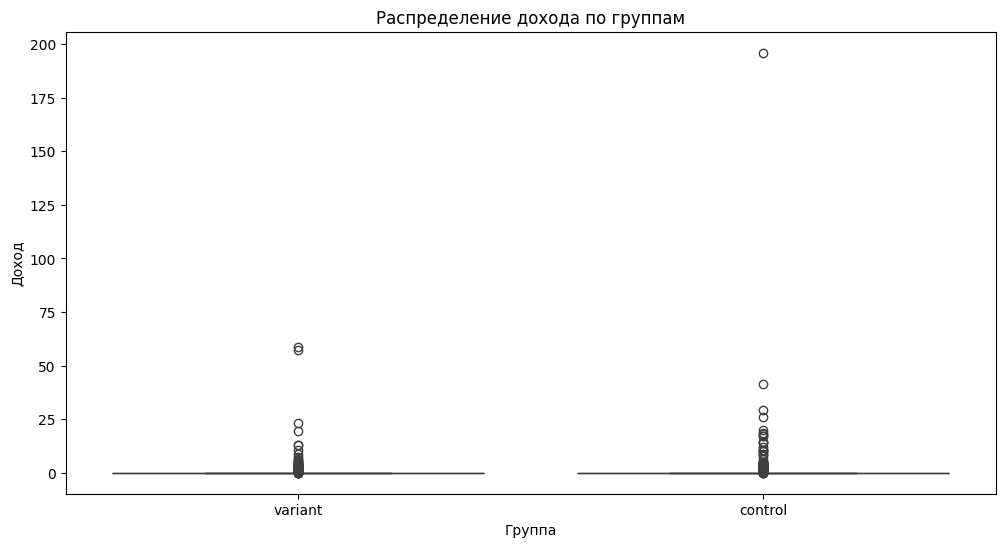

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='VARIANT_NAME', y='REVENUE')
plt.xlabel('Группа')
plt.ylabel('Доход')
plt.title('Распределение дохода по группам')

## Из графиков видно, что распределения доходов в группах не являются нормальными, присутствует большое количество выбросов. Также наблюдается, что результаты группы B хуже, чем группы A, что указывает на низкую конверсию в покупку. Рекомендуется провести оценку длительности теста и увеличить объем данных, чтобы получить более детальное представление о производительности групп.

### Для проверки нормальности используем критерий Шапиро-Уилка.

In [ ]:
alpha = 0.05
pvalue = stats.shapiro(data['REVENUE'])[1]
print('Распределение ' + ['','НЕ'][pvalue < alpha] + ' нормальное')

Распределение НЕ нормальное


### Учитывая ненормальное распределение данных, ограниченное количество данных в группах и наличие выбросов, для сравнения эффективности групп применим критерий Манна-Уитни.

In [ ]:
group_A = data[data['VARIANT_NAME'] == 'A']
group_B = data[data['VARIANT_NAME'] == 'B']

In [ ]:
# Проверка на наличие элементов в выборках
if len(group_A) > 0 and len(group_B) > 0:
    # Проведение теста Манна-Уитни
    mw_stats = mannwhitneyu(x=group_A['REVENUE'].values, y=group_B['REVENUE'].values)
    mw_stats
else:
    print('Одна из выборок пустая. Проверьте данные.')


Одна из выборок пустая. Проверьте данные.


## Вывод

Т.к. одна из выборок пустая, то критерий Манна-Уитни не может быть применен, так как требуется наличие данных в обеих выборках для сравнения.

Для дальнейшего анализа и проверки данных, можно сначала проверить, в какой группе отсутствуют данные и почему. Возможно, произошла ошибка в сборе данных или данные были случайно утеряны.

После выяснения причины отсутствия данных в одной из выборок, нужно принять меры для восстановления данных или провести дополнительные эксперименты, чтобы собрать недостающую информацию.

В свете таких обстоятельств, необходимо провести дополнительные исследования и анализировать результаты только на основе надежных и полных данных. Убедитесь, что все данные собраны корректно и нет пропущенных значений.